### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import visuals as vs

from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer

# Pretty display for notebooks
%matplotlib inline

# Show all of the data in a dataframe
pd.set_option('display.max_columns', None)

### Load Data

In [2]:
# Training Set
application_train = pd.read_csv('data/tmp/application_train_preprocessed.csv', index_col=0)
#application_train = pd.read_csv('data/tmp/application_train_standard_scaler_no_log_transformation_preprocessed.csv', index_col=0)
#application_train = pd.read_csv('data/tmp/application_train_standard_scaler_preprocessed.csv', index_col=0)

print("Loaded Training Set: {0} rows".format(application_train.shape[0]))

# Testing Set
application_test = pd.read_csv('data/tmp/application_test_preprocessed.csv', index_col=0)
#application_test = pd.read_csv('data/tmp/application_test_standard_scaler_no_log_transformation_preprocessed.csv', index_col=0)
#application_test = pd.read_csv('data/tmp/application_test_standard_scaler_preprocessed.csv', index_col=0)

print("Loaded Testing Set: {0} rows".format(application_test.shape[0]))

Loaded Training Set: 307511 rows
Loaded Testing Set: 48744 rows


In [3]:
display(application_train.head())

,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,BOOL_FLAG_EMAIL,BOOL_FLAG_EMP_PHONE,BOOL_FLAG_OWN_CAR,BOOL_FLAG_OWN_REALTY,BOOL_FLAG_PHONE,BOOL_FLAG_WORK_PHONE,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_REGISTRATION,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_MOBIL,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUR_APPR_PROCESS_START_0,HOUR_APPR_PROCESS_START_1,HOUR_APPR_PROCESS_START_10,HOUR_APPR_PROCESS_START_11,HOUR_APPR_PROCESS_START_12,HOUR_APPR_PROCESS_START_13,HOUR_APPR_PROCESS_START_14,HOUR_APPR_PROCESS_START_15,HOUR_APPR_PROCESS_START_16,HOUR_APPR_PROCESS_START_17,HOUR_APPR_PROCESS_START_18,HOUR_APPR_PROCESS_START_19,HOUR_APPR_PROCESS_START_2,HOUR_APPR_PROCESS_START_20,HOUR_APPR_PROCESS_START_21,HOUR_APPR_PROCESS_START_22,HOUR_APPR_PROCESS_START_23,HOUR_APPR_PROCESS_START_3,HOUR_APPR_PROCESS_START_4,HOUR_APPR_PROCESS_START_5,HOUR_APPR_PROCESS_START_6,HOUR_APPR_PROCESS_START_7,HOUR_APPR_PROCESS_START_8,HOUR_APPR_PROCESS_START_9,HOUSETYPE_MODE_not specified,HOUSETYPE_MODE_org spec account,HOUSETYPE_MODE_reg oper account,HOUSETYPE_MODE_reg oper spec account,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_

### Performance Metric

In [4]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Define Target Criteria

In [5]:
# Our goal is to identify clients with payment difficulties
# This is defined by the TARGET feature (1 = payment difficulites, 0 = pays as expected)
target_train = application_train['TARGET']
application_train = application_train.drop('TARGET', axis = 1)

### Shuffle and Split Data

In [6]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split  # use model_selection to suppress deprecation warning

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(application_train, target_train, test_size=0.3, random_state=23)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Naive Predictor Peformance

For the sake of getting a benchmark to compare against, our naive model will assume that everyone pays back their loans on time (TARGET = 0).  The vast majority of people in this dataset pay back their loans on time, so we expect the naive predictor to achieve a high accuracy score and a low F1 score.

In [7]:
from sklearn.metrics import fbeta_score

# In this instance, we'll assume that TARGET always equals 0 (i.e. the borrower pays the loan as expected)

# True Positives - TARGET = 0
# False Positives - TARGET = 1

FP = np.sum(y_train) # All the records with payment problems (which are erroneously flagged as good)
TP = y_train.count() - FP # All the records, less the false positives

FN = 0 # All predicted values are False, so we have no False negatives
TN = 0 # All predicted values are False, so we have no True Negatives

# TODO: Calculate accuracy, precision and recall
accuracy = TP / y_train.count()
recall = TP / TP + FN
precision = TP / (TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + (beta **2)) * ((precision * recall) / (((beta ** 2 ) * precision) + recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))
print("Number of Records with Payment Problems: {0}".format(np.sum(y_train)))
print("Total Number of Records: {0}".format(y_train.count()))
print("Percent of Records with Payment Problems: {0}%".format((np.sum(y_train) / y_train.count())*100))

Naive Predictor: [Accuracy score: 0.9190, F-score: 0.9341]
Number of Records with Payment Problems: 17441
Total Number of Records: 215257
Percent of Records with Payment Problems: 8.10240781949019%


### Training and Prediction Pipeline

In [8]:
# Borrowed from the CharityML Project

# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from time import clock
'''
inputs:
   - learner: the learning algorithm to be trained and predicted on
   - sample_size: the size of samples (number) to be drawn from training set
   - X_train: features training set
   - y_train: income training set
   - X_test: features testing set
   - y_test: income testing set
'''

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
        
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = clock() # Get start time
    learner = learner
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = clock() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()

    start = clock() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:2000])
    end = clock() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 2000 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(predictions_train, y_train[:2000])
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(predictions_test, y_test)
    
    # TODO: Compute F-score on the the first 2000 training samples using fbeta_score()
    # We want to minimize false positives by favoring precision, so we'll set beta to > 1
    results['f_train'] = fbeta_score(y_train[:2000], predictions_train, 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, 0.5)
       
    # Success
    print("Test Accuracy {0}, Test F-Score {1}, Predicted_Test {2}, Predicted_Train {3}, Actual Test {4}, Actual Train {5}".format(\
        results['acc_test'], results['f_test'], np.sum(predictions_test), np.sum(predictions_train), np.sum(y_test), np.sum(y_train)))
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Initial Model Validation

Number of Positive Samples in 100% 17441 10% 1830 1% 192
Test Accuracy 0.9195156849567498, Test F-Score 0.014873254009311948, Predicted_Test 87, Predicted_Train 133, Actual Test 7384, Actual Train 17441
RandomForestClassifier trained on 2152 samples.
Test Accuracy 0.919092939059553, Test F-Score 0.024925224327018946, Predicted_Test 160, Predicted_Train 138, Actual Test 7384, Actual Train 17441
RandomForestClassifier trained on 21525 samples.
Test Accuracy 0.9192013354434496, Test F-Score 0.028040877367896313, Predicted_Test 160, Predicted_Train 140, Actual Test 7384, Actual Train 17441
RandomForestClassifier trained on 215257 samples.


/Users/jeclark/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Test Accuracy 0.9199601101307261, Test F-Score 0.0, Predicted_Test 0, Predicted_Train 0, Actual Test 7384, Actual Train 17441
LogisticRegression trained on 2152 samples.
Test Accuracy 0.9199601101307261, Test F-Score 0.0, Predicted_Test 0, Predicted_Train 0, Actual Test 7384, Actual Train 17441
LogisticRegression trained on 21525 samples.
Test Accuracy 0.9199601101307261, Test F-Score 0.0, Predicted_Test 0, Predicted_Train 0, Actual Test 7384, Actual Train 17441
LogisticRegression trained on 215257 samples.
Test Accuracy 0.9113317579725541, Test F-Score 0.13905238375515008, Predicted_Test 1552, Predicted_Train 32, Actual Test 7384, Actual Train 17441
AdaBoostClassifier trained on 2152 samples.
Test Accuracy 0.9197758362781018, Test F-Score 0.05617977528089888, Predicted_Test 201, Predicted_Train 2, Actual Test 7384, Actual Train 17441
AdaBoostClassifier trained on 21525 samples.
Test Accuracy 0.920122704706571, Test F-Score 0.049068948163059886, Predicted_Test 141, Predicted_Train 2, A

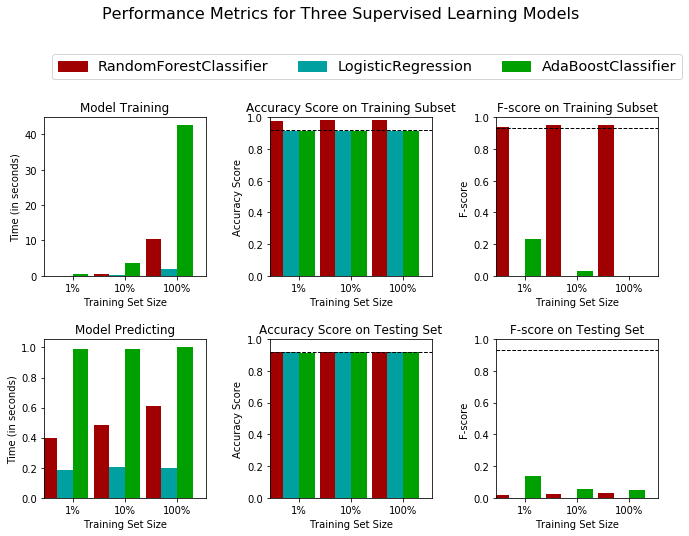

In [9]:
# TODO: Import the three supervised learning models from sklearn
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import svm

# TODO: Initialize the three models
# NOTE: Seeded random_state per review feedback
clf_A = RandomForestClassifier(random_state=29)
clf_B = LogisticRegression(random_state=29)
clf_C = AdaBoostClassifier(random_state=29)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 = int(len(y_train)/100)

print("Number of Positive Samples in 100% {0} 10% {1} 1% {2}".format(np.sum(y_train),np.sum(y_train[:samples_10]),np.sum(y_train[:samples_1])))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [16]:
#display(results)

### Model Tuning

In [17]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the classifier
# NOTE: Seeded random_state per review feedback

#parameters = {'n_estimators':[1,100], 'learning_rate':[0.1,1,10,100],'random_state':[42]}

#Optimized Model
#------
#Final accuracy score on the testing data: 0.0831
#Final F-score on the testing data: 0.1018
#AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=10, n_estimators=100, random_state=42)
#AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1, n_estimators=100, random_state=None)

#1000 estimators is marginally better, and 10000 is computationally prohibitive.  
#100 seems like the sweet spot
#parameters = {'n_estimators':[1,10,100], 'learning_rate':[1],'random_state':[42]}
#AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1, n_estimators=100, random_state=None)

# Taking a deeper look at the smaller estimator values with a tuned n_estimators rate
parameters = {'n_estimators':[100], 'learning_rate':[1, 1.25, 1.5, 2],'random_state':[42]}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1, n_estimators=100, random_state=None)

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)


# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print(best_clf)

Unoptimized model
------
Accuracy score on testing data: 0.9200
F-score on testing data: 0.0687

Optimized Model
------
Final accuracy score on the testing data: 0.9194
Final F-score on the testing data: 0.1031
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.5, n_estimators=100, random_state=42)


### Model Optimization Results

###### Naive Model

Naive Predictor: Accuracy score: 0.9190, F-score: 0.9341

###### Unoptimized model
- Accuracy score on testing data: 0.91688108971623
- F-score on testing data: 0.08198935103017209

##### Optimized Model
- Final accuracy score on the testing data: 0.9200
- Final F-score on the testing data: 0.0687

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,n_estimators=100, random_state=42)

### Feature Importance

In [12]:
clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Precalculate this for the Dimensionality Reduction section
original_predictions = clf.predict(X_test)

importances = clf.feature_importances_
#std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

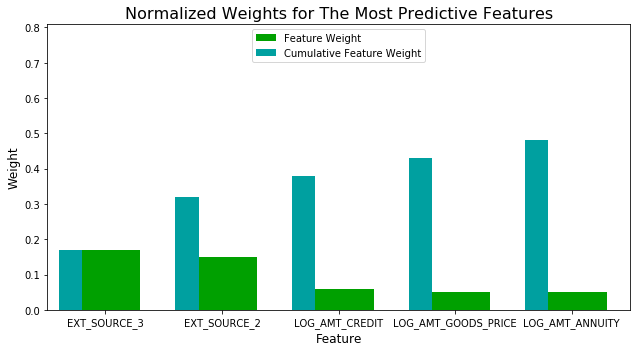

In [13]:
# Plot
vs.feature_plot(importances, X_train, y_train)

### Dimensionality Reduction

In [14]:
# Create a model with the reduced feature space
reduced_clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,n_estimators=100, random_state=42)

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:40]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:40]]]

reduced_clf.fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = reduced_clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, original_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, original_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.9200
F-score on testing data: 0.0687

Final Model trained on reduced data
------
Accuracy on testing data: 0.9198
F-score on testing data: 0.0693


### Export

In [15]:
application_train.to_csv('data/tmp/application_train_reduced.csv')
application_test.to_csv('data/tmp/application_test_reduced.csv')